# Projeto Prático Perceptron Rosenblatt

Neste projeto prático, o objetivo é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado
do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

## Equipe:

1. Afonso Henrique Torres Lucas | ifonso.developer@gmail.com | iFonso - 2215080047
2. Erik Gustavo Lima de Oliveira | erik.exatas10@gmail.com | ErikExatas - 2115080049
3. David Augusto De Oliveira E Silva | david-augusto-silva - 2115080006
4. Lilian Iazzai De Souza Oliveira | lilianiazzai@gmail.com | lilianiazzai - 2215080018
5. Vitor Nascimento Aguiar | Vtaguiar1909 - 2115080055

In [11]:
# identificador do arquivo
id = (7+9+6+8+5)%4
print(id)

3


### Bibliotecas necessárias

In [12]:
# Bibliotecas
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from prettytable import PrettyTable
import seaborn as sns

# Módulos
from modules.perceptron import Perceptron

### Parte 1 - Resolvendo um Problema Linearmente Separável

In [13]:
def get_ndarray_from_file(filename: str) -> np.ndarray:
    """Formato dos dados -> (m, 1, 3) : [[[x_1, x_2, y_d]], ...]"""
    return np.squeeze(np.fromfile(filename, dtype=np.float64).reshape(-1, 1, 3))

In [14]:
def split_data(data: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Faz split do dataset -> (m, 2), (m, 1)"""
    return data[:, :2], data[:, 2].reshape(-1, 1)

In [15]:
data = get_ndarray_from_file(f"./data/dataAll.txt")
X, y = split_data(data)

print(f"data: {data.shape} -> {data[0]}")
print(f"X: {X.shape} | y: {y.shape}")

data: (1000, 3) -> [-363.7884  244.1423    0.    ]
X: (1000, 2) | y: (1000, 1)


In [16]:
array = np.frombuffer(data, dtype=np.float64)
dados = array.reshape(-1, 3)
X = dados[:, :2]
y = dados[:, 2]

perceptron = Perceptron(input_size=2)

print("Pesos iniciais:", perceptron.weights)

Pesos iniciais: [ 0.40629558 -0.40000208  0.2485513 ]


In [17]:
# treinamento
y_reshaped = y.reshape(-1, 1)  # Garante que y tem a forma (n, 1)
epocas, ajustes = perceptron.train(X, y_reshaped, learning_rate=0.1)
print(f"\nTotal de ajustes: {ajustes}")
print(f"Épocas até a convergência: {epocas}")


Total de ajustes: 973
Épocas até a convergência: 4


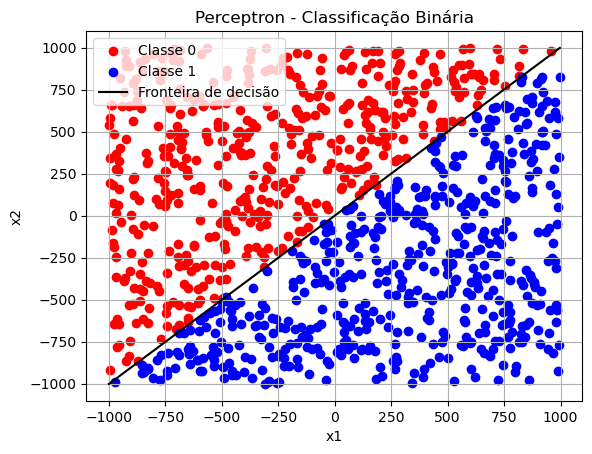

In [18]:
# plotagem
classe_0 = X[y == 0]
classe_1 = X[y == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')

w = perceptron.weights
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True)
plt.show()

### Parte 2 - Experimentação

Nesta parte, as equipes usarão o seu identificador para trabalhar com um arquivo específico. Usaremos, então, o arquivo ```data3.txt```.

Aproveitando o algoritmo construído na seção 2.1, serão executadas 10 repetições deste para seguintes configurações: $\eta \times I = \{0.4, 0.1, 0.01\} \times \{(-100, +100), (-0.5, +0.5)\}$, em que I é o intervalo utilizado para distribuição uniforme do valor dos pesos. No total, serão feitas 60 execuções: 10 execuções para cada uma das 6 configurações.

In [19]:
tabela = PrettyTable([
    "Taxa de aprendizado",
    "Intervalo de Pesos",
    "Quantidade de Ajustes",
    "Menor número de épocas para convergência"
])

In [20]:
data = get_ndarray_from_file(f"./data/data{id}.txt")
X3, y3 = split_data(data)

In [21]:
intervals = ((-0.5, 0.5), (-100, 100))
learning_rates = (0.4, 0.1, 0.01)

In [22]:
# execução do algoritmo para o intervalo (-0.5, 0.5)
for l in learning_rates:
    epochs=[]
    adjustments = []
    for i in range(10):
        p1 = Perceptron(2, intervals[0])
        e = p1.train(X3, y3, l)
        epochs.append(e)
        adjustments.append(e)
    avg = np.average(adjustments)
    std_dev = np.std(adjustments)
    min_epochs = min(epochs)

    tabela.add_row([
        f"{l}",
        f"{intervals[0][0]}, {intervals[0][1]}",
        f"{avg:.1f} +- {std_dev:.1f}",
        f"{min_epochs}"])


In [23]:
# execução do algoritmo para o intervalo (-100, 100)
for l in learning_rates:
    epochs=[]
    adjustments = []
    for i in range(10):
        p1 = Perceptron(2, intervals[1])
        e = p1.train(X3, y3, l)
        epochs.append(e)
        adjustments.append(e)
    avg = np.average(adjustments)
    std_dev = np.std(adjustments)
    min_epochs = min(epochs)

    tabela.add_row([
        f"{l}",
        f"{intervals[1][0]}, {intervals[1][1]}",
        f"{avg:.1f} +- {std_dev:.1f}",
        f"{"Não convergiu" if min_epochs < 0 else min_epochs}"])

TypeError: '<' not supported between instances of 'tuple' and 'int'

In [ ]:
tabela

Taxa de aprendizado,Intervalo de Pesos,Quantidade de Ajustes,Menor número de épocas para convergência
0.4,"-0.5, 0.5",431.2 +- 426.8,"(4, 760)"
0.1,"-0.5, 0.5",475.0 +- 467.1,"(5, 816)"
0.01,"-0.5, 0.5",420.9 +- 431.1,"(8, 918)"


### Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

In [25]:
data = get_ndarray_from_file(f"./data/dataHoldout.txt")
X, y = split_data(data)

In [26]:
array = np.frombuffer(data, dtype=np.float64)
dados = array.reshape(-1, 3)
dados
X = dados[:, :2]
y = dados[:, 2]

perceptron = Perceptron(input_size=2)

print("Pesos iniciais:", perceptron.weights)

Pesos iniciais: [ 0.03611583 -0.25228348  0.12668765]


In [27]:
y_reshaped = y.reshape(-1, 1)  # Garante que y tem a forma (n, 1)
epocas, ajustes = perceptron.train(X, y_reshaped, learning_rate=0.1)
print(f"\nTotal de ajustes: {ajustes}")
print(f"Épocas até a convergência: {epocas}")


Total de ajustes: 35006
Épocas até a convergência: -1


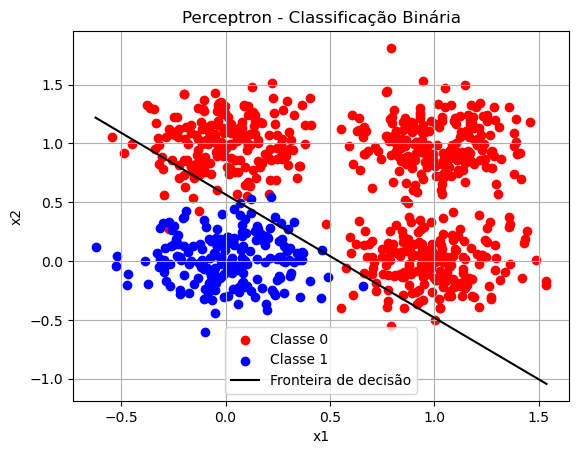

In [28]:
# plotagem do problema não linearmente separável
classe_0 = X[y == 0]
classe_1 = X[y == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')

w = perceptron.weights
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True)
plt.show()

In [29]:
#Separa as partes de treino e de teste com base no tamanho de treino 
def train_test_split(data: np.ndarray, train_size:float) -> tuple[np.ndarray, np.ndarray, np.ndarray,np.ndarray]:
    np.random.seed(id)
    random_dataset = data[np.random.permutation(len(data))]
    bound = int(len(data)*train_size)
    return random_dataset[:bound, :2], random_dataset[bound:, :2],random_dataset[:bound,2].reshape(-1, 1), random_dataset[bound:,2].reshape(-1, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, train_size=0.7)

In [31]:
X_train

array([[-0.027351  , -0.14271275],
       [ 0.6876728 ,  0.14567997],
       [-0.10074294, -0.31860073],
       ...,
       [ 0.29560862,  0.08406349],
       [ 0.08298076,  0.12868493],
       [ 0.85097786,  0.21687544]], shape=(560, 2))

In [32]:
X_test

array([[ 1.17887195e+00,  1.17246976e+00],
       [ 9.08911300e-01,  8.57731775e-01],
       [-9.64316158e-02, -2.34546028e-01],
       [ 2.13127937e-01,  9.53036677e-01],
       [-2.26713614e-01,  2.18413706e-01],
       [ 1.28885445e+00, -7.48863393e-02],
       [ 9.73491531e-01,  1.10759835e+00],
       [-3.15804787e-03,  1.26357387e+00],
       [ 2.54943181e-02,  8.76548706e-01],
       [ 7.82748977e-01,  1.01845852e+00],
       [ 2.72382741e-01,  1.83593970e-01],
       [ 8.48969906e-01, -2.85479863e-01],
       [ 1.19114892e+00,  8.28491343e-01],
       [ 1.53646324e+00, -2.03469917e-01],
       [-1.11598940e-01,  1.12623683e+00],
       [ 5.53582617e-01,  1.12372063e+00],
       [ 5.90165774e-01,  9.74584545e-01],
       [ 1.26957045e+00,  9.29829021e-01],
       [ 9.43222607e-01,  1.36834236e-02],
       [-3.48640585e-02,  1.15509737e+00],
       [ 1.07832531e+00, -2.97611606e-01],
       [-1.97918238e-01,  7.30777229e-01],
       [ 6.64977605e-01, -1.03145629e-01],
       [ 1.

In [33]:
y_train

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [34]:
y_test

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [35]:
# Gerar previsões (1 amostra por vez) 
y_pred = []
for x in X:
    y_pred.append(perceptron.predict(x))

# Matriz de confusão
cm = skm.confusion_matrix(y, y_pred)

# Relatório detalhado (acurácia, precisão, recall, F1)
rep = skm.classification_report(y, y_pred, digits=4)


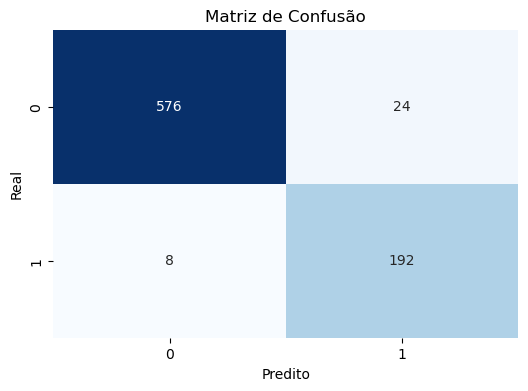

In [36]:
# Plot da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [37]:
print("\nRelatório de Classificação:")
print(rep)


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0     0.9863    0.9600    0.9730       600
         1.0     0.8889    0.9600    0.9231       200

    accuracy                         0.9600       800
   macro avg     0.9376    0.9600    0.9480       800
weighted avg     0.9619    0.9600    0.9605       800

